### Load Preprocessed data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import csv
import pandas as pd
import numpy as np
import librosa
import os,sys
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
ROOT_PATH='./drive/MyDrive/ASR_Project_Shared/'

## Creating a softlink to drive root, easy for relative addressing

## Guys 

# nb_path = './metadata_multi_clap_noise_marathi_bingte2.csv.pkl'
# os.symlink(ROOT_PATH+'metadata_multi_clap_noise_marathi_bingte2.csv.pkl', nb_path)
# sys.path.insert(0, nb_path) 

# nb_path = './metadata_allspeech_noisyspeech_spamfiles.csv'
# os.symlink(ROOT_PATH+'metadata_allspeech_spamfiles.csv', nb_path)
# sys.path.insert(0, nb_path) 

nb_path = './final_data'
os.symlink(ROOT_PATH+'final_data', nb_path)
sys.path.insert(0, nb_path) 

nb_path = './final_pkl'
os.symlink(ROOT_PATH+'final_pkl', nb_path)
sys.path.insert(0, nb_path) 


# nb_path = './metadata_multi_clap_noise_marathi_bingte2.csv'
# os.symlink(ROOT_PATH+'metadata_multi_clap_noise_marathi_bingte2.csv', nb_path)
# sys.path.insert(0, nb_path) 

# nb_path = './metadata_denoised.csv'
# os.symlink(ROOT_PATH+'metadata_denoised.csv', nb_path)
# sys.path.insert(0, nb_path) 

# nb_path = './metadata_allspeech_spamfiles_RNN.pkl'
# os.symlink(ROOT_PATH+'metadata_allspeech_spamfiles_RNN.pkl', nb_path)
# sys.path.insert(0, nb_path) 


nb_path = './metadata_multi_clap_noise_marathi_bingte2_RNN.pkl'
os.symlink(ROOT_PATH+'metadata_multi_clap_noise_marathi_bingte2_RNN.pkl', nb_path)
sys.path.insert(0, nb_path) 


In [ ]:
# !rm metadata_allspeech_spamfiles.pkl
# !rm metadata_multi_clap_noise_marathi_bingte2.pkl

In [ ]:
# nb_path = './metadata_allspeech_spamfiles.csv.pkl'
# os.symlink(ROOT_PATH+'metadata_allspeech_spamfiles.csv.pkl', nb_path)
# sys.path.insert(0, nb_path) 


# nb_path = './metadata_multi_clap_noise_marathi_bingte2.csv.pkl'
# os.symlink(ROOT_PATH+'metadata_multi_clap_noise_marathi_bingte2.csv.pkl', nb_path)
# sys.path.insert(0, nb_path) 

In [ ]:
# !rm rnn_train.pkl
# nb_path = './rnn_train.pkl'
# os.symlink(ROOT_PATH+'rnn_train.pkl', nb_path)
# sys.path.insert(0, nb_path) 

In [ ]:
# !rm rnn_train_tot.pkl
# nb_path = './rnn_train_tot.pkl'
# os.symlink(ROOT_PATH+'rnn_train_tot.pkl', nb_path)
# sys.path.insert(0, nb_path) 

In [ ]:
# # retrieve the preprocessed data from previous notebook

# %store -r x_train 
# %store -r x_test 
# %store -r y_train 
# %store -r y_test 
# %store -r yy 
# %store -r le

import pickle
featuresdf =  pickle.load( open( "./final_pkl/RNN/normal/train_metadata_speech{all_clap}_noise{all_clap+noiseclips}.pkl", "rb" ) )

#featuresdf = featuresdf.sample(frac=1).reset_index(drop=True)
features_marathidf = pickle.load( open( "./final_pkl/RNN/normal/test_metadata_speech{all_clap}_noise{qut+spam} - test_metadata_speech{all_clap}_noise{qut+spam}.pkl", "rb" ) )
#features_marathidf = features_marathidf.sample(frac=1).reset_index(drop=True)
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


featuresdf = featuresdf.sample(frac=1).reset_index(drop=True)
featuresdf = featuresdf.sample(frac=1).reset_index(drop=True)
featuresdf = featuresdf.sample(frac=1).reset_index(drop=True)

features_marathidf = features_marathidf.sample(frac=1).reset_index(drop=True)
features_marathidf = features_marathidf.sample(frac=1).reset_index(drop=True)
features_marathidf = features_marathidf.sample(frac=1).reset_index(drop=True)


# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 
# split the dataset 
from sklearn.model_selection import train_test_split 

#x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

x_train = X
y_train = yy


X = np.array(features_marathidf.feature.tolist())
y = np.array(features_marathidf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

x_test = X
y_test = yy

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = yy.shape[1]
filter_size = 2

In [ ]:
#RNN model 


#Create Keras Model
## Expecting data of shape:  ( batch,seq(200),feat(40) )
seq_len = 200
feat_size = 40
num_classes = 2
def create_RNN_Model():

    model = Sequential()
    model.add(LSTM(128, batch_input_shape=(None,seq_len,feat_size), return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    # model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.adam(), metrics=['accuracy'])
    # model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
    # print(model.summary())

    # model.fit(x_train, y_train, batch_size=30, epochs=10, verbose=1)
    return model

In [ ]:
try:
    del model
except:
    print("Model doesn't exist")
model = create_RNN_Model()

### Compiling the model 

For compiling our model, we will use the following three parameters: 

* Loss function - we will use `categorical_crossentropy`. This is the most common choice for classification. A lower score indicates that the model is performing better.

* Metrics - we will use the `accuracy` metric which will allow us to view the accuracy score on the validation data when we train the model. 

* Optimizer - here we will use `adam` which is a generally good optimizer for many use cases.


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [ ]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 86,786
Trainable params: 86,786
Non-trainable params: 0
_________________________________________________________________
Pre-training accuracy: 70.7602%


### Training 

Here we will train the model. 

We will start with 100 epochs which is the number of times the model will cycle through the data. The model will improve on each cycle until it reaches a certain point. 

We will also start with a low batch size, as having a large batch size can reduce the generalisation ability of the model. 

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 2
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)
# model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/2
141/141 [==============================] - 26s 168ms/step - loss: 0.0385 - accuracy: 0.9933 - val_loss: 1.3047 - val_accuracy: 0.8090

Epoch 00001: val_loss improved from inf to 1.30472, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 2/2
141/141 [==============================] - 24s 168ms/step - loss: 3.0519e-04 - accuracy: 1.0000 - val_loss: 1.6224 - val_accuracy: 0.8090

Epoch 00002: val_loss did not improve from 1.30472
Training completed in time:  0:00:49.326387


### Test the model 

Here we will review the accuracy of the model on both the training and test data sets. 

In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  1.0
Testing Accuracy:  0.808966875076294


The initial Training and Testing accuracy scores are quite high. As there is not a great difference between the Training and Test scores (~5%) this suggests that the model has not suffered from overfitting. 

In [ ]:

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    plots the confusion matrix
    """
    matrix = confusion_matrix(y_true, y_pred)    
    fig, ax = plt.subplots(figsize=(4,3))
    plt.imshow(matrix)
    ax.set_xticks(range(len(labels)));
    ax.set_xticklabels(labels, rotation=0)
    ax.set_yticks(range(len(labels)));
    ax.set_yticklabels(labels)
    max_confusions = 0
    confused_classes = (-1, -1)
    for i, true_label in enumerate(matrix):
        for j, predicted_label in enumerate(true_label):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="r");
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.title("Confusion Matrix");

In [ ]:
y_pred_ = model.predict(x_test, use_multiprocessing=True, workers=6, verbose=1)

33/33 [==============================] - 3s 64ms/step


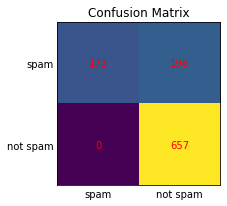

In [ ]:
y_pred = np.argmax(y_pred_, axis=1)
y_true = np.argmax(y_test, axis=1)
#labels = []_
labels =['spam','not spam']

plot_confusion_matrix(y_true, y_pred, labels)

In [ ]:
model.save('trained_rnn.h5')

### Predictions  

Here we will build a method which will allow us to test the models predictions on a specified audio .wav file. 

In [ ]:
import keras
magic = keras.models.load_model('trained_rnn.h5')

In [ ]:
import librosa 
import numpy as np 

# def extract_feature(file_name):
   
#     try:
#         audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
#         mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
#         mfccsscaled = np.mean(mfccs.T,axis=0)
        
#     except Exception as e:
#         print("Error encountered while parsing file: ", file)
#         return None, None

#     return np.array([mfccsscaled])



seq_len = 200
def extract_feature(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        # mfccsscaled = np.mean(mfccs.T,axis=0)
        
        to_pad = mfccs[:,:seq_len]
        v = max(0, (seq_len-to_pad.shape[-1]))
        mfccsscaled = np.pad(to_pad,((0,0),(0,v))).T
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return np.array([mfccsscaled])

In [ ]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    predicted_vector = magic.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = magic.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

### Validation 

#### Test with sample data 

Initial sainity check to verify the predictions using a subsection of the sample audio files we explored in the first notebook. We expect the bulk of these to be classified correctly. 

In [ ]:
# Class: Air Conditioner

filename = 'final_data/noise/CAFE-CAFE-1_trim_5s_505.wav' 
print_prediction(filename) 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


The predicted class is: 1 

0 		 :  0.00012945652997586876153945922852
1 		 :  0.99987053871154785156250000000000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
